## <b> Librerias </b>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <b> Dataset y parametros iniciales </b>

In [2]:
data = np.load('proyecto_training_data.npy')
dataset = pd.DataFrame(data, 
                columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd',
                         'YearBuilt', 'LotFrontage'])
colnames = dataset.columns.to_list()

## <b> Ingenieria de caracteristicas </b>

### Evaluación de valores nulos

In [3]:
dataset.isnull().mean()

SalePrice       0.000000
OverallQual     0.000000
1stFlrSF        0.000000
TotRmsAbvGrd    0.000000
YearBuilt       0.000000
LotFrontage     0.177397
dtype: float64

### Imputación por media y mediana

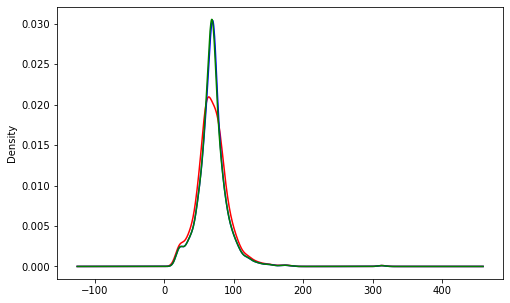

In [4]:
meanValues = np.round(dataset['LotFrontage'].mean(), 0)
medianValues = np.round(dataset['LotFrontage'].median(), 0)
dataset_FL_meanImp = dataset['LotFrontage'].fillna(meanValues)
dataset_FL_medianImp = dataset['LotFrontage'].fillna(medianValues)

fig = plt.figure(figsize = (8,5))
fig.add_subplot(111)
dataset['LotFrontage'].plot.density(color="red")
dataset_FL_meanImp.plot.density(color="blue")
dataset_FL_medianImp.plot.density(color="green")
plt.show()

cor_media = np.corrcoef(dataset_FL_meanImp, dataset['SalePrice'])[0,1]
cor_mediana = np.corrcoef(dataset_FL_medianImp, dataset['SalePrice'])[0,1]

if cor_media > cor_mediana:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(meanValues) 
else:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(medianValues) 

### Evaluación de valores nulos despues de imputación

In [5]:
dataset.isnull().mean()

SalePrice       0.0
OverallQual     0.0
1stFlrSF        0.0
TotRmsAbvGrd    0.0
YearBuilt       0.0
LotFrontage     0.0
dtype: float64

## <b> Inciso 2: Distribucion de datos: 80% Entreno y 20% Test </b>

In [6]:
entrenamiento = dataset.sample(frac=0.8)
indices = entrenamiento.index.to_list()
test = dataset.reset_index()
test = test[~test['index'].isin(indices)]
test.drop(columns='index', inplace=True)

In [7]:
dataset.shape, entrenamiento.shape, test.shape

((1460, 6), (1168, 6), (292, 6))

## <b> Inciso 3: Analisis Exploratorio </b>

In [8]:
for x in colnames:
    print(f"""{x}:
        Media: {round(dataset[x].mean(),0)}
        Valor maximo: {round(dataset[x].max(),0)}
        Valor minimo: {round(dataset[x].min(),0)}
        Rango: {round(dataset[x].max() - dataset[x].min(),0)}
        Desviacion estandar: {round(dataset[x].std(),0)}
    -------------------------------------------------""")

SalePrice:
        Media: 180921.0
        Valor maximo: 755000.0
        Valor minimo: 34900.0
        Rango: 720100.0
        Desviacion estandar: 79443.0
    -------------------------------------------------
OverallQual:
        Media: 6.0
        Valor maximo: 10.0
        Valor minimo: 1.0
        Rango: 9.0
        Desviacion estandar: 1.0
    -------------------------------------------------
1stFlrSF:
        Media: 1163.0
        Valor maximo: 4692.0
        Valor minimo: 334.0
        Rango: 4358.0
        Desviacion estandar: 387.0
    -------------------------------------------------
TotRmsAbvGrd:
        Media: 7.0
        Valor maximo: 14.0
        Valor minimo: 2.0
        Rango: 12.0
        Desviacion estandar: 2.0
    -------------------------------------------------
YearBuilt:
        Media: 1971.0
        Valor maximo: 2010.0
        Valor minimo: 1872.0
        Rango: 138.0
        Desviacion estandar: 30.0
    -------------------------------------------------
LotFr

## <b>Inciso 4: Graficos de distribución para cada variable  </b>

c:\Users\apatz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\apatz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\apatz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

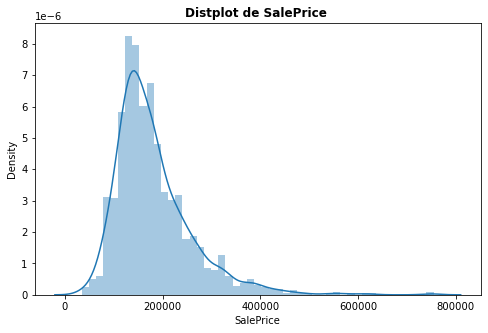

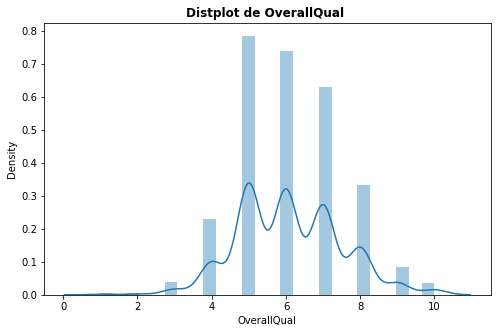

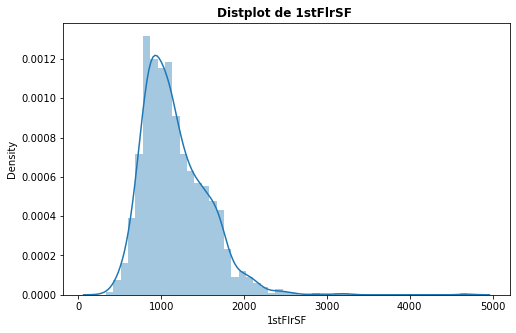

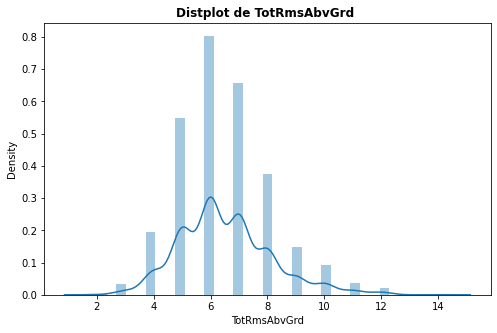

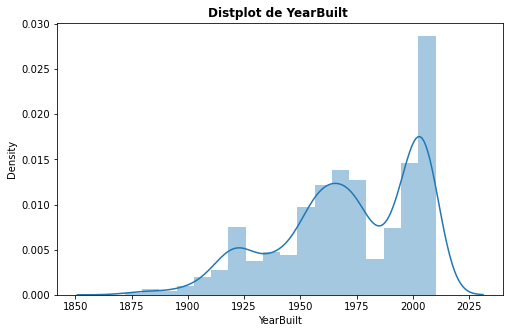

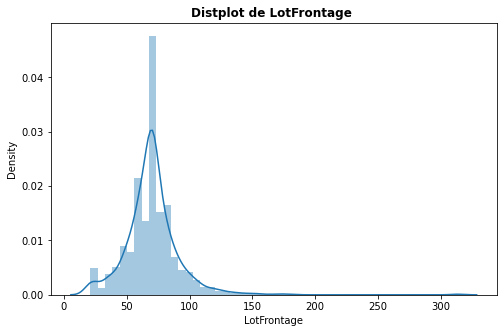

In [9]:
for x in colnames:
    plt.figure(figsize = (8,5))
    sns.distplot(dataset[x])
    plt.title(f"""Distplot de {x} """, fontdict={'weight': 'bold'})

## <b>Inciso 5: Calculos de variable X </b>

### Calculo de coeficiente de correlación 

In [10]:
def calcCorrCoef (df, target):
    for col in df.columns:
        print('Correlacion - ' + col + ":",
            df[target].corr(df[col], method='pearson'))

calcCorrCoef(dataset, 'SalePrice')

Correlacion - SalePrice: 0.9999999999999998
Correlacion - OverallQual: 0.7909816005838052
Correlacion - 1stFlrSF: 0.6058521846919145
Correlacion - TotRmsAbvGrd: 0.5337231555820281
Correlacion - YearBuilt: 0.5228973328794971
Correlacion - LotFrontage: 0.33489718326981494


### Graficas de scatter plot: X vs Y 

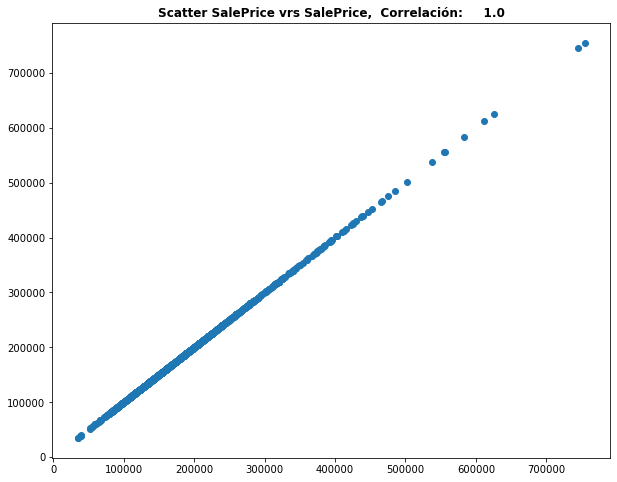

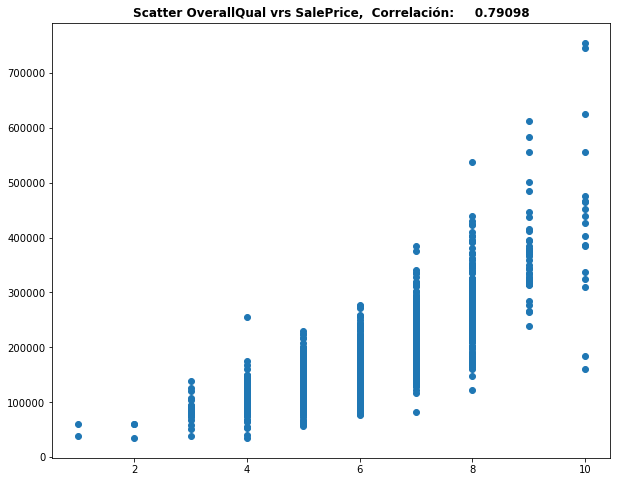

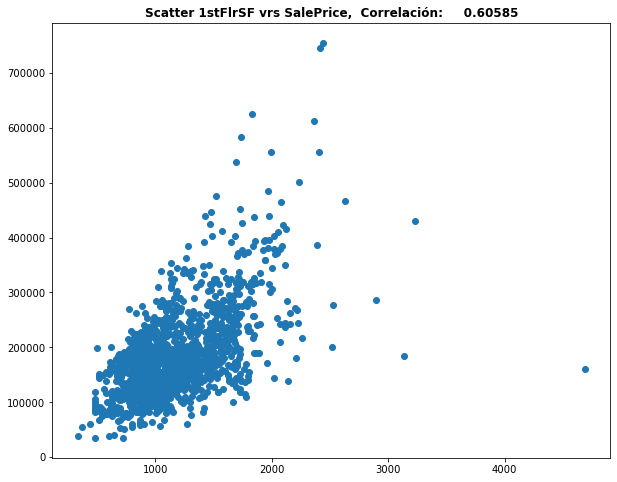

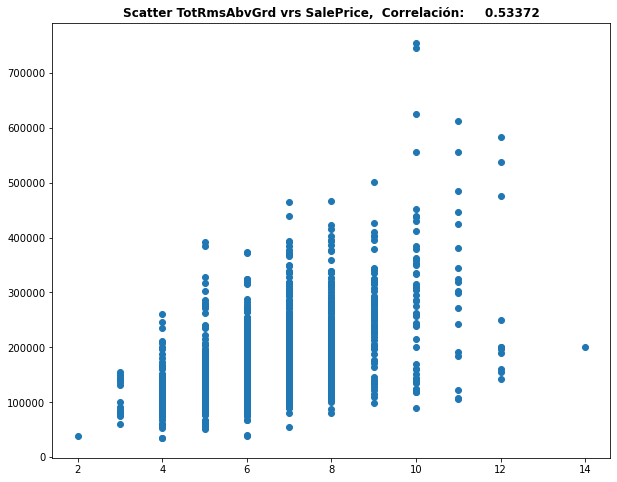

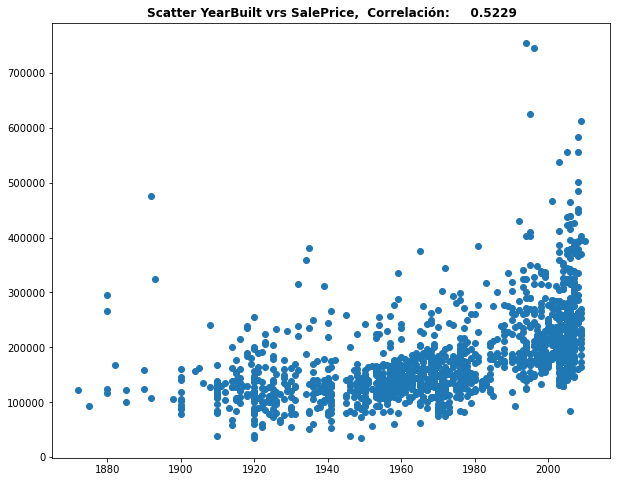

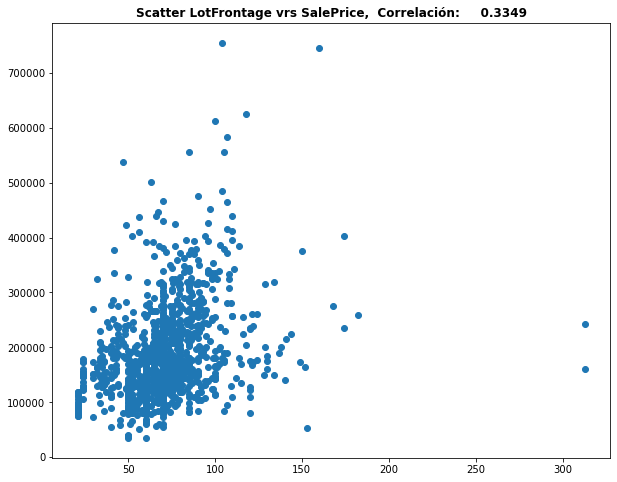

In [11]:
target = 'SalePrice'
keys = []
corr = []
for x in colnames:
    coef_corr = round(np.corrcoef(dataset[x], dataset[target])[0,1],5) 
    plt.figure(figsize = (10,8))
    plt.scatter(dataset[x], dataset[target])
    plt.title(f"""Scatter {x} vrs {target},  Correlación: \
    {coef_corr}""", 
    fontdict={'weight': 'bold'})
    plt.show()
    keys.append(x)
    corr.append(coef_corr)

### Elección de 2 variables con mas potencial predictivo

In [12]:
correlacion = pd.DataFrame(list(zip(keys,corr)), columns = ['variable','correlacion'])
correlacion = correlacion[correlacion['variable']!=target].sort_values(by=['correlacion'], ascending=False)
correlacion = correlacion[0:2]
print('\033[1m' + 'Variables con mayor potencial predictivo' + '\033[0m')
correlacion

Variables con mayor potencial predictivo


,variable,correlacion
1,OverallQual,0.79098
2,1stFlrSF,0.60585


## <b>Inciso 6 y 7: Función para entreno de modelo de regresión </b>

In [15]:
def regresion(set, var_x, var_y, epoc, imprimir, learning):
    dataset = set.copy()
    x = dataset[var_x]
    y = dataset[var_y]
    epochs = epoc
    imprimir_error_cada = imprimir 
    learning_rate = learning

    unos = np.ones(np.shape(x)).reshape(-1,1)
    x = x.to_numpy().reshape(-1,1)
    A = np.hstack([x, unos])
    errores = []
    b0 = 10
    b1 = 20

    for i in range(epochs):
        betas = np.array([b1,b0]).reshape(-1,1)
        yEstimado = np.matmul(A, betas) # Evaluamos el modelo con los betas default.

    ## ===== gradiente del error respecto de cada parametro ===== ##
        gradienteB0 = np.mean((yEstimado - y.to_numpy()))
        gradienteB1 = np.mean((yEstimado - y.to_numpy())*x)

    ## ===== Actualización de parametros ===== ##
        b0 = b0 - learning_rate*gradienteB0
        b1 = b1 - learning_rate*gradienteB1

    ## ===== Error o función de costo ===== ##
        if(i % imprimir_error_cada) == 0:
            errores.append(np.mean((yEstimado - y.to_numpy())**2)*1/2)
        
    return b0, b1, errores

In [21]:
regresion(dataset,'OverallQual', 'SalePrice',100,20, 0.2)  

(-1.6766492699015667e+88,
 -1.0738717104565104e+89,
 [19495763826.86365,
  1.0687590327299453e+44,
  7.331378158450086e+77,
  5.029113584650324e+111,
  3.4498266084068904e+145])